Multi-Level Neural Networks for Poisson problem in 1D. (Example 4 in [1])

Note: In this example the normalization factor $\mu$ are chosen as a hyper-parameter.

[1] Aldirany, Z., Cottereau, R., Laforest, M., & Prudhomme, S. (2024). Multi-level neural networks for accurate solutions of boundary-value problems. Computer Methods in Applied Mechanics and Engineering, 419, 116666.


 Training of Level 0 

Epoch [1/4000], Loss train: 1.6919e+03, Loss test: 1.5443e+03
Epoch [100/4000], Loss train: 1.2319e+01, Loss test: 1.0423e+01
Epoch [200/4000], Loss train: 2.2275e+00, Loss test: 2.0850e+00
Epoch [300/4000], Loss train: 6.3044e-01, Loss test: 5.9068e-01
Epoch [400/4000], Loss train: 1.8924e-01, Loss test: 1.7663e-01
Epoch [500/4000], Loss train: 8.7762e-02, Loss test: 8.1049e-02
Epoch [600/4000], Loss train: 6.3665e-02, Loss test: 5.8349e-02
Epoch [700/4000], Loss train: 5.2596e-02, Loss test: 4.8037e-02
Epoch [800/4000], Loss train: 4.3974e-02, Loss test: 4.0035e-02
Epoch [900/4000], Loss train: 3.6573e-02, Loss test: 3.3188e-02
Epoch [1000/4000], Loss train: 3.0261e-02, Loss test: 2.7377e-02
Epoch [1100/4000], Loss train: 2.4957e-02, Loss test: 2.2518e-02
Epoch [1200/4000], Loss train: 2.0559e-02, Loss test: 1.8508e-02
Epoch [1300/4000], Loss train: 1.6952e-02, Loss test: 1.5232e-02
Epoch [1400/4000], Loss train: 1.4024e-02, Loss test: 1.2580e-02
Epoch [1500/4

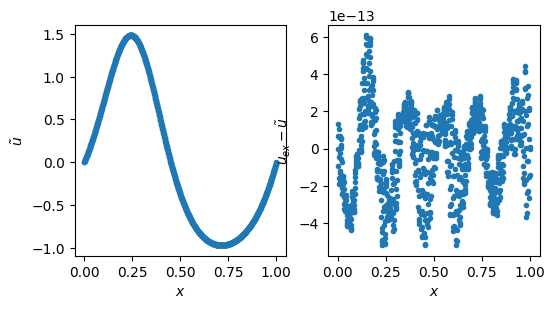

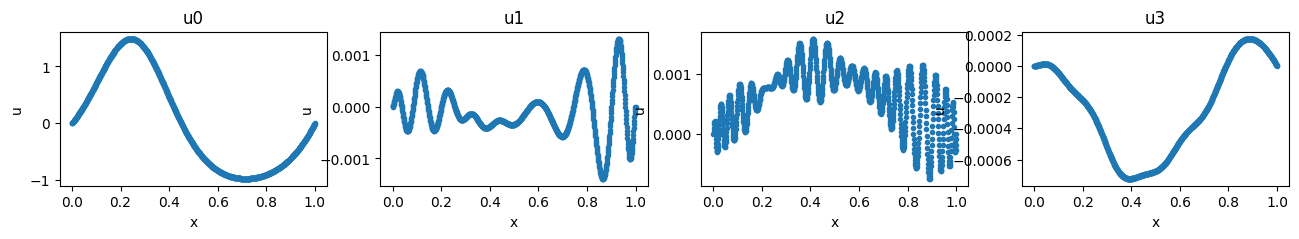

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import model
import functions_plot

torch.set_default_dtype(torch.float64)
torch.set_default_device("cuda" if torch.cuda.is_available() else "cpu")

if __name__ == "__main__":

    seed = 40
    np.random.seed(seed)
    torch.manual_seed(seed)

    # parameters
    hp = {
        # problem
        'dim' : 1,
        'k' : 2,
        'x_left' : 0,
        'x_right' : 1,

        # optimizer
        'Adam': [True, True, True, True],
        'LBFGS': [True, True, True, False],
        'lr_bfgs': [1,1,1,1], #learning rate of bfgs
        'lr_adam': [1e-2,1e-2,1e-2,1e-2], #learning rate of adam
        # Each LBFGS iteration here consists of 20 sub-iterations
        'niter_bfgs':[200,400,600,0], #number of iterations of bfgs
        'niter_adam':[4000,4000,4000,4000], #number of iterations of adam

        # training points
        'N_points_train': [1000],
        'N_points_test': [300],
        'N_points_plot': [1000],

        # network architecture
        'width': [10,20,40,20],
        'fourier_feat_input': True,
        'fourier_feat_g': True,
        # Multi levels
        'lvls': 4,
        'mu':[1e0,1e3,1e3,1e2], # normalization factor
        'M':[0,2,4,0], # To calculate omega_m

        # plot and print choice
        'print_interval_adam': 100,
        'print_interval_bfgs': 20,
                  }

    # Train the model
    combined_model = model.train_multi_level(hp)
    # Plot the results
    functions_plot.main_plot(combined_model, hp)